# Prédiction des chiffres manuscrits avec un réseau de neurones feedforward

Dans ce notebook, nous allons explorer le puissant monde de l'apprentissage profond en utilisant un réseau de neurones feedforward (FNN) pour prédire des chiffres manuscrits. Nous utiliserons le célèbre jeu de données MNIST, qui est une collection de 70 000 images de chiffres manuscrits de 0 à 9. Chaque image est en niveaux de gris et mesure 28x28 pixels, ce qui en fait un excellent point de départ pour l'apprentissage profond en raison de sa simplicité.

## Structure du notebook

Le notebook est organisé de la manière suivante :

1. **Importation des bibliothèques nécessaires** : Nous commençons par importer toutes les bibliothèques nécessaires pour notre analyse. Cela comprend pandas et numpy pour la manipulation des données, matplotlib pour la visualisation des données, et bien sûr, tensorflow pour construire et entraîner notre modèle de réseau de neurones.

2. **Chargement et prétraitement des données** : Nous chargeons le jeu de données MNIST à l'aide de la fonction `load_data` de tensorflow. Ensuite, nous normalisons les images en divisant chaque pixel par la valeur maximale (255), ce qui nous donne des valeurs de pixel entre 0 et 1. 

3. **Construction du modèle** : Nous construisons notre modèle FNN à l'aide de l'API Keras dans tensorflow. Notre modèle est constitué de trois couches denses, avec la fonction d'activation ReLU pour les deux premières couches et la fonction d'activation softmax pour la couche de sortie.

4. **Entraînement du modèle** : Nous compilons notre modèle avec l'optimiseur Adam, et la perte de "sparse_categorical_crossentropy", qui est appropriée pour la classification multiclasse. Ensuite, nous entraînons le modèle sur notre jeu de données d'entraînement pendant trois époques.

5. **Évaluation du modèle** : Nous évaluons la performance de notre modèle sur le jeu de données de test et affichons la perte et la précision.

6. **Prédiction sur une nouvelle image** : Enfin, nous utilisons notre modèle entraîné pour prédire un chiffre à partir d'une nouvelle image.

Ce notebook démontre comment un réseau de neurones peut être utilisé pour la tâche complexe de la reconnaissance des chiffres manuscrits. Alors, commençons notre exploration du monde fascinant de l'apprentissage profond.

Le code ci-dessous est organisé en plusieurs étapes clés de prétraitement des données, de création et d'entraînement d'un modèle de réseau de neurones, et enfin de l'évaluation du modèle. 

1. **Importation des bibliothèques** : Les bibliothèques nécessaires à l'exécution de ce script sont importées. Cela comprend 'pandas' et 'numpy' pour la manipulation des données, 'matplotlib.pyplot' pour la visualisation des données, 'tensorflow.keras' pour la construction et l'entraînement des modèles de réseau de neurones, et 'cv2' (OpenCV) pour la manipulation d'images.

2. **Chargement des données** : Le jeu de données MNIST est chargé à l'aide de la fonction `mnist.load_data()` de Keras, qui retourne deux tuples contenant les données d'entraînement et de test respectivement.

3. **Prétraitement des données** : Les données d'entraînement et de test sont normalisées pour que toutes les valeurs de pixel se situent entre 0 et 1. Cela se fait en utilisant la fonction `normalize` de Keras.

4. **Création du modèle de réseau de neurones** : Un modèle séquentiel est créé avec trois couches. Les deux premières couches sont des couches denses (fully connected) avec 128 neurones chacune et utilisent la fonction d'activation ReLU. La dernière couche est également une couche dense avec 10 neurones (correspondant aux 10 classes de chiffres de 0 à 9) et utilise la fonction d'activation softmax pour prédire la probabilité de chaque classe.

5. **Compilation du modèle** : Le modèle est compilé avec l'optimiseur 'adam', qui est une méthode de descente de gradient stochastique adaptative. La fonction de perte utilisée est 'sparse_categorical_crossentropy', qui est appropriée pour des problèmes de classification multiclasse où les classes sont des entiers (par opposition à des vecteurs one-hot). La métrique d'évaluation utilisée est l'exactitude ('accuracy').

6. **Entraînement du modèle** : Le modèle est entraîné sur les données d'entraînement pendant 3 époques.

7. **Évaluation du modèle** : Le modèle est évalué sur les données de test en utilisant la méthode `evaluate`. Cela retourne la perte et l'exactitude du modèle sur les données de test. Dans ce cas, la perte est d'environ 0.091 et l'exactitude est d'environ 97.12%, indiquant que le modèle a une performance élevée dans la prédiction des chiffres manuscrits sur les données de test.

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import normalize
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
import cv2 as cv

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [23]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(units=128, activation=tf.nn.relu))
model.add(layers.Dense(units=128, activation=tf.nn.relu))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=3)
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2609 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1070 - accuracy: 0.9663
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0908 - accuracy: 0.9712


In [25]:
print(loss, accuracy)

0.09084444493055344 0.9711999893188477


Cette partie du code teste la capacité du modèle de réseau de neurones entraîné à prédire un chiffre manuscrit à partir d'une image que vous avez créée vous-même.

Voici une explication détaillée du code:

1. **Chargement de l'image**: L'image 'digit.png', qui contient un chiffre que vous avez écrit manuellement (l'image doit être en format 28x28), est chargée en utilisant la fonction `imread` de OpenCV. L'image est en couleur et le code `[:,:,0]` extrait le premier canal de couleur (rouge dans le cas d'une image en couleur RGB) car le modèle de réseau de neurones est entraîné sur des images en niveaux de gris.

2. **Inversion de l'image**: Comme les images du jeu de données MNIST sont des images en niveaux de gris où le chiffre est en blanc sur un fond noir, nous devons inverser notre image (qui est probablement un chiffre noir sur un fond blanc) pour correspondre à ce format. C'est ce que fait la fonction `np.invert`.

3. **Prédiction**: Le modèle de réseau de neurones est utilisé pour prédire le chiffre de l'image. Comme le modèle a été construit pour prédire les probabilités de chaque classe (chiffre), la fonction `np.argmax` est utilisée pour sélectionner la classe qui a la probabilité la plus élevée. Le chiffre prédit par le modèle est affiché.

4. **Affichage de l'image**: Enfin, l'image est affichée à l'aide de `plt.imshow` pour vous permettre de visualiser le chiffre que vous avez écrit et qui est utilisé pour la prédiction.

Dans votre cas, le chiffre écrit était un '6', et le modèle a correctement prédit ce chiffre, ce qui démontre la capacité du modèle à lire correctement les chiffres manuscrits, y compris ceux qui ne faisaient pas partie du jeu de données d'entraînement original.

In [30]:
img = cv.imread('digit.png')[:, :, 0]
img = np.invert(np.array([img]))

Prediction : 6


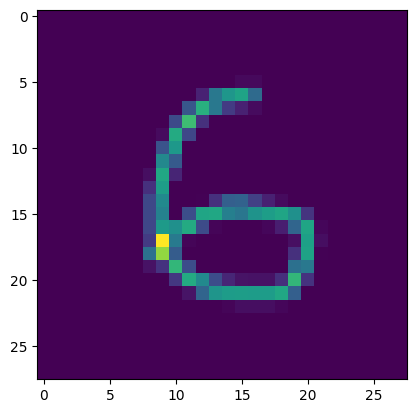

In [32]:
prediction = model.predict(img)
print("Prediction : {}".format(np.argmax(prediction)))
plt.imshow(img[0])